In [1]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets
import tqdm
import pickle

In [2]:
SIMPATH = '/media/michele/My Book/Michele/MySimulations/MovingBox/np'

In [3]:
SIM = 'mb.69002'
TRAJ = 'p150_a800_r600'

In [4]:
from simulation.units import gadget_time_units, gadget_dens_units
conv_fac = gadget_time_units.in_units('Gyr')
conv_fac

0.9778139512067809

In [5]:
sim_path = os.path.join(SIMPATH, "{}_{}".format(SIM, TRAJ), "out")
sim = simulation.Simulation(sim_path, snap_indexes=slice(None, None, 1))

loading simulation: /media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.69002_p150_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 563 snapshots (slice(None, None, 1))
Loading cosmological parameters
Found trace file


In [6]:
from simulation.sfh_in_box import sfh, plot_sfh, plot_binned_sfh

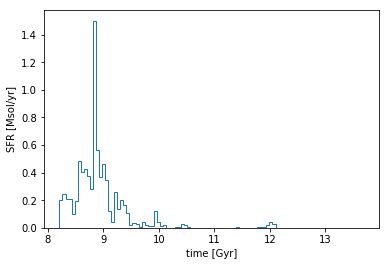

In [7]:
plot_binned_sfh(sim)

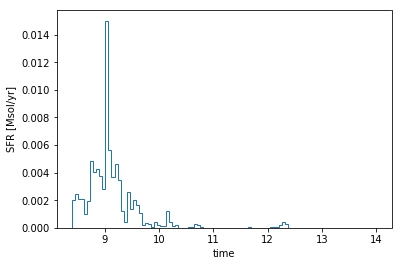

In [8]:
plot_binned_sfh(sim, in_gyr=False)

In [9]:
dt, sfr = sfh(sim)

In [10]:
dt.shape

(562,)

In [11]:
sfr.shape

(562,)

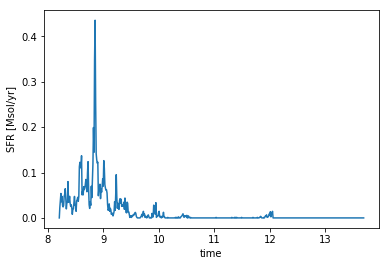

In [14]:
plot_sfh(sim)

In [15]:
sfh_t = sim[0].header.time + np.cumsum(dt)
sfh_t[0], sfh_t[-1]

(8.399992040672968, 14.0)

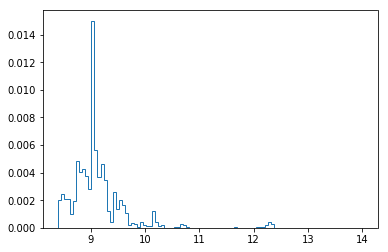

In [17]:
sfhist, thebins, patches = plt.hist(sfh_t, weights=sfr*(sfh_t[1] - sfh_t[0]), bins=100, histtype='step')

In [36]:
bins = np.linspace(sfh_t[0], sfh_t[-1], 100)

In [37]:
sfh, sfhbins = np.histogram(sfh_t, weights=sfr, bins=bins)

In [38]:
sfhtimes = 0.5*(sfhbins[1:] + sfhbins[:-1])

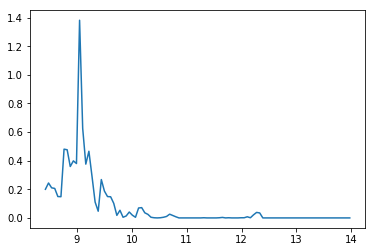

In [41]:
fig, ax = plt.subplots()
ax.plot(sfhtimes, sfh)

In [8]:
def sigma(vel):
    return np.sqrt(((vel - vel.mean(axis=0))**2).mean())

In [9]:
from generate_data_moria import dump_features

In [10]:
sim[0]

<SimSnap "/media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.69002_p150_a800_r600/out/snapshot_0001" len=588566>

In [11]:
gCosmoOrb_rdwarf = 50

In [12]:
sphere = pynbody.filt.Sphere(gCosmoOrb_rdwarf * pynbody.units.kpc)
snap = sim[0]
pynbody.analysis.halo.center(snap.s, vel=False)
pynbody.analysis.luminosity.half_light_r(snap.s[sphere])

SimArray(2.3207567, 'kpc')

In [8]:
load_pickle = True
if load_pickle:
    times, mass, sigma_star, sigma_gas, r_eff = pickle.load(open('{}_{}.pickle'.format(SIM,TRAJ), 'rb'))
else:
    dump_features(sim, '{}_{}.pickle'.format(SIM,TRAJ))
    times, mass, sigma_star, sigma_gas, r_eff = pickle.load(open('{}_{}.pickle'.format(SIM,TRAJ), 'rb'))
#     sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)
#     mass = list()
#     r_eff = list()
#     sigma_star = list()
#     sigma_gas = list()
#     for snap in tqdm.tqdm(sim.snap_list):
#         pynbody.analysis.halo.center(snap.s, vel=False)
#         sphere_r_eff = pynbody.filt.Sphere(gCosmoOrb_rdwarf * pynbody.units.kpc)
#         mass.append(snap.s[sphere]['mass'].sum().in_units('Msol'))
#         r_eff.append(pynbody.analysis.luminosity.half_light_r(snap.s[sphere]))
#         sigma_star.append(sigma(snap.s[sphere]['vel']))
#         sigma_gas.append(sigma(snap.g[sphere]['vel']))
#     # DUMP
#     times = sim.times
#     data = [times, mass, sigma_star, sigma_gas, r_eff]
#     with open('{}_{}.pickle'.format(SIM,TRAJ), 'wb') as f:
#         pickle.dump(data, f)


loading simulation: 69002
Found 202 snapshots
Found 202 snapshots
No sumfile found


Fixing cosmological parameters of MoRIA simulation


/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)


0 Time [Gyr]
1 Time [Gyr]
2 time
3 Time [Gyr]
4 Time [Gyr]
5 
6 $z$


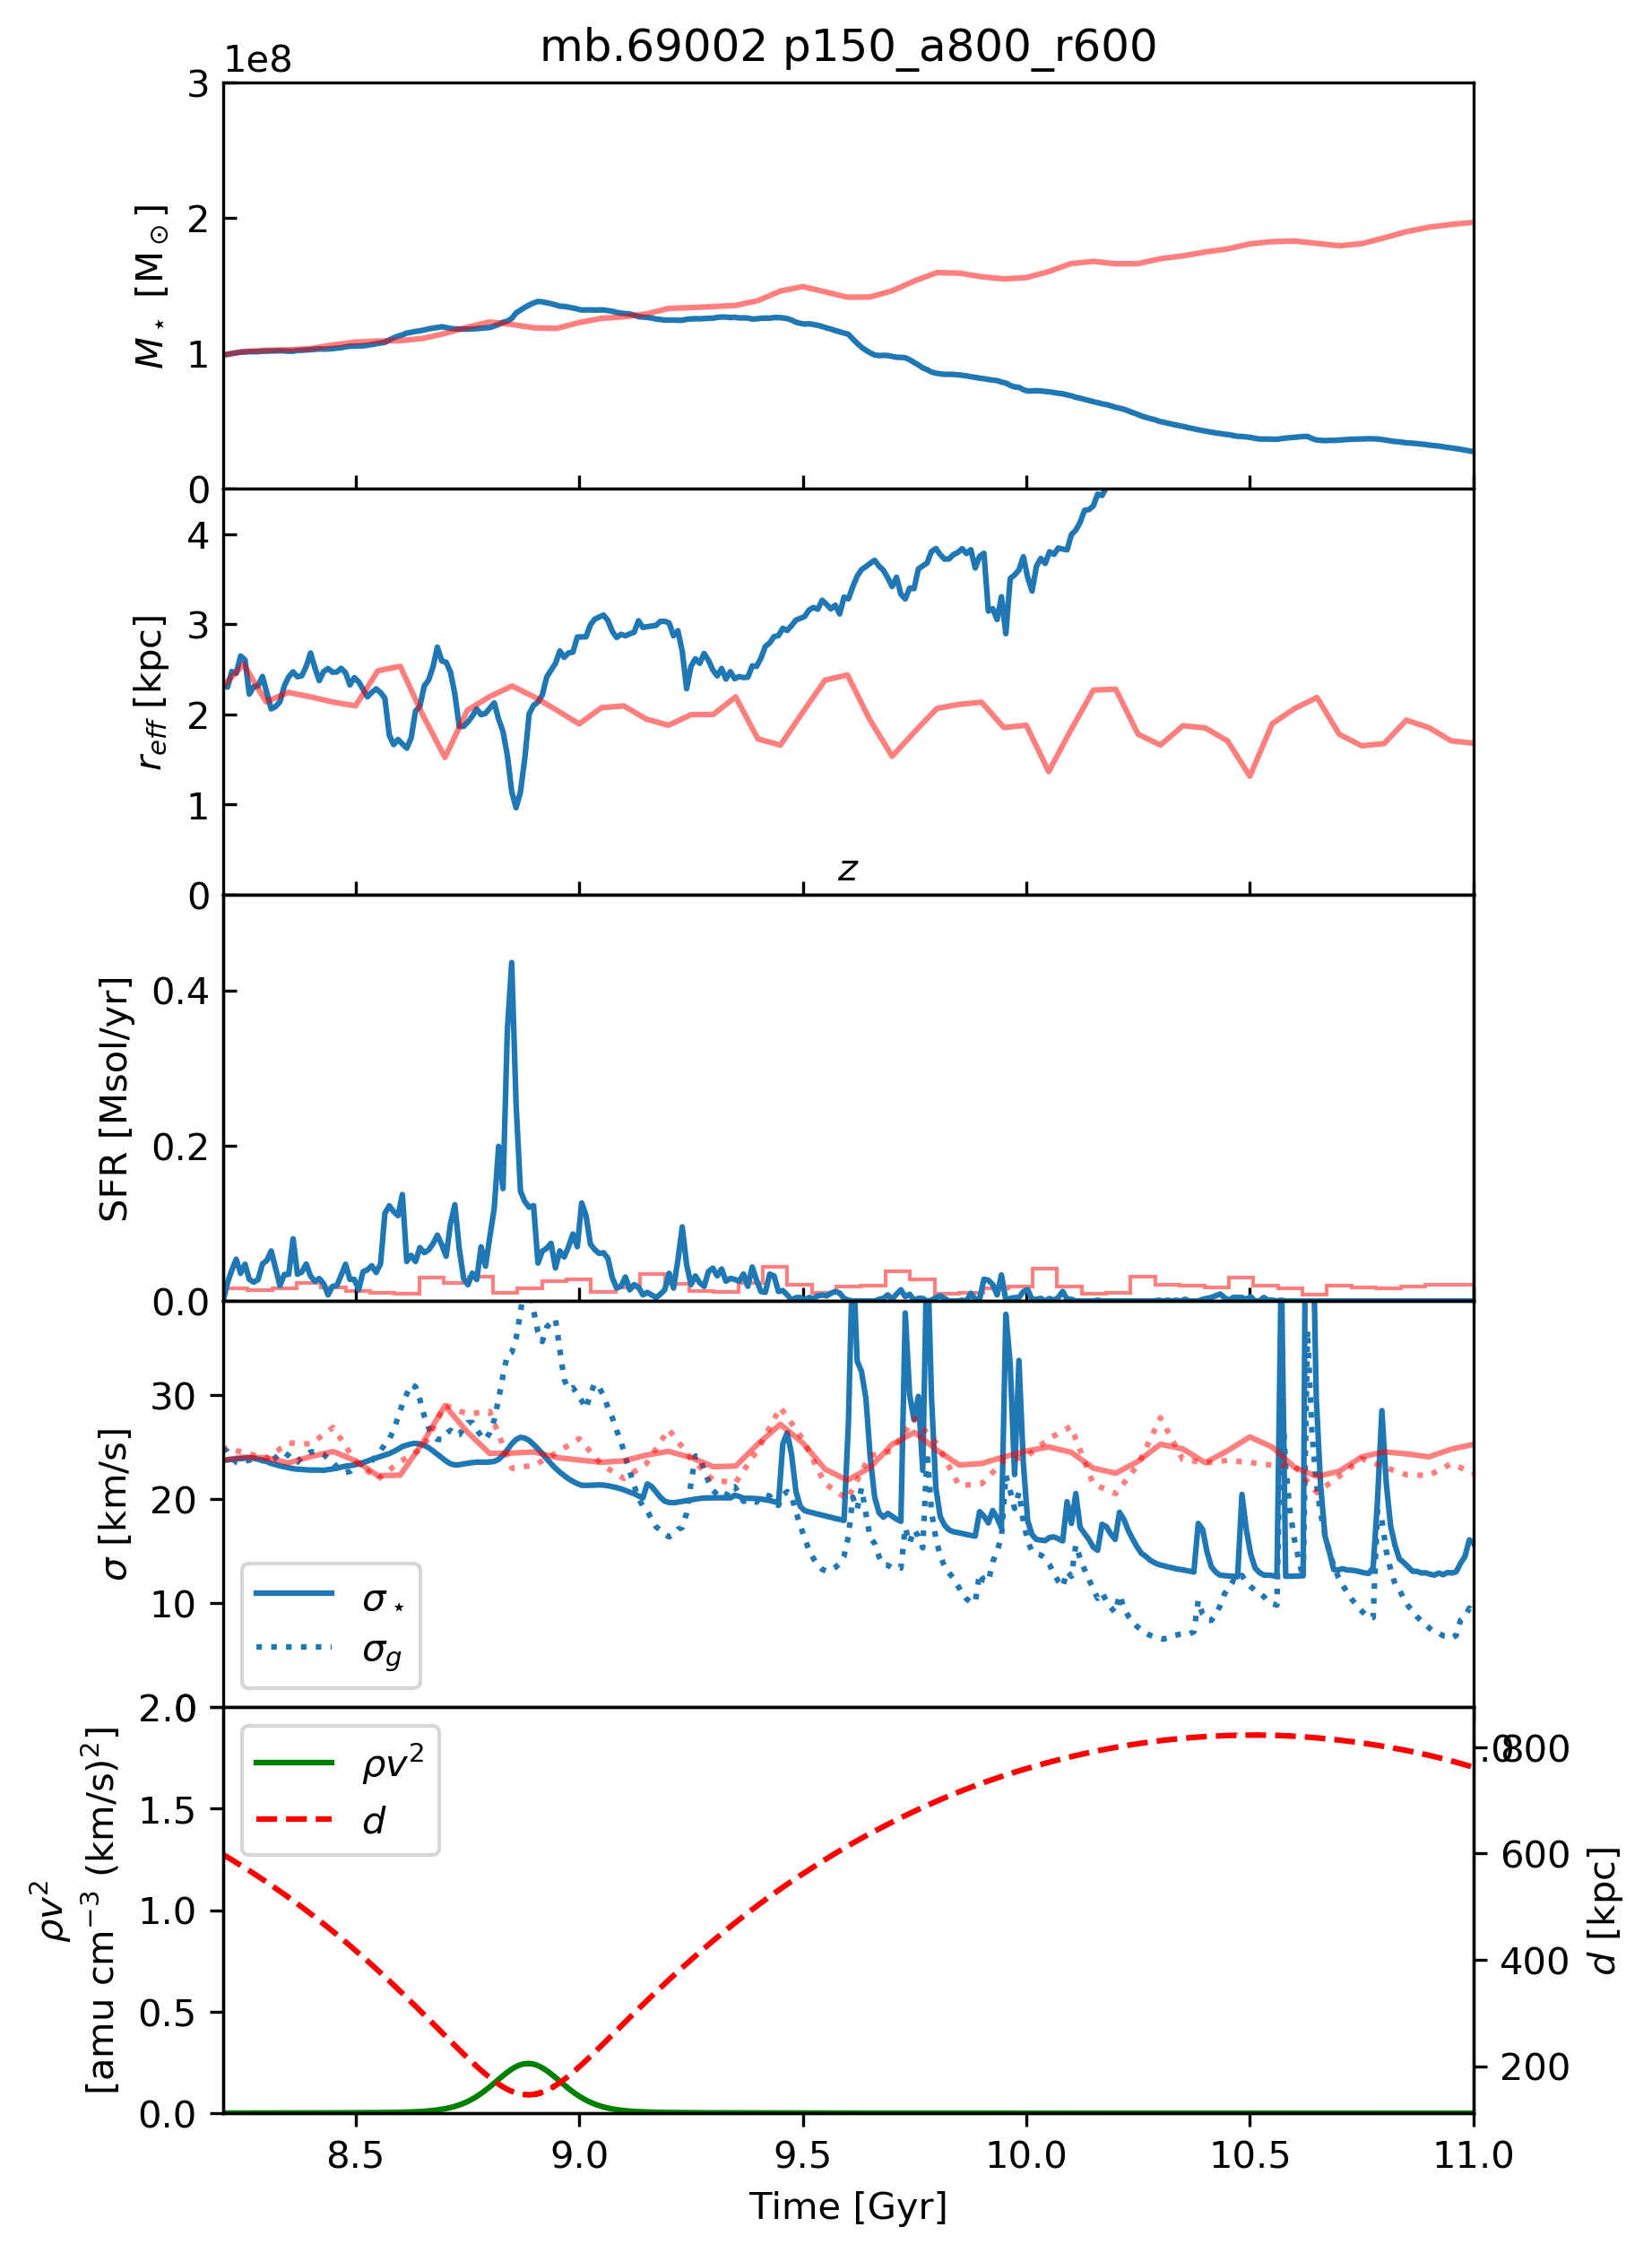

In [9]:
fig, (ax_m_star, ax_r_eff, ax_sfh, ax_sigma, ax_ram) = plt.subplots(5, figsize=(6,10), dpi=300)
ax_m_star.plot(times, mass)
ax_m_star.set_xlabel("Time [Gyr]")
ax_m_star.set_ylabel("$M_\star$ [M$_\odot]$");
ax_m_star.ticklabel_format(style='sci', scilimits=(0,0))

ax_r_eff.plot(times, r_eff)
ax_r_eff.set_xlabel("Time [Gyr]")
ax_r_eff.set_ylabel("$r_{eff}$ [kpc]");

# plot_sfh(sim, ax=ax_sfh)
# sim.plot_sfh(ax_sfh, range=(times[0], times[-1]));
# snap1 = sim[200]
# snap2 = sim[300]
# print(sim[150].properties['time'].in_units('Gyr'))
# pynbody.plot.sfh(snap2, range=(sim.times[0], sim.times[-1]), subplot=ax_sfh, color='C0')
# pynbody.plot.sfh(snap1, range=(sim.times[0], snap1.properties['time'].in_units('Gyr')), subplot=ax_sfh, color='C0')
# pynbody.plot.sfh(snap2, range=(snap1.properties['time'].in_units('Gyr'), sim.times[-1]), subplot=ax_sfh, color='C0')

# ax_sfh.ticklabel_format(style='sci', scilimits=(0,0))

# ax_r.plot(sim.trace.t, sim.trace.r, '--', color='r', alpha=0.5, label='$d$')
ram_pressure = pynbody.array.SimArray(sim.dens_trace.rho.values, gadget_dens_units).in_units('amu cm^-3')*sim.dens_trace.vel
ax_ram.plot(sim.dens_trace.t*conv_fac, ram_pressure, color='g', label=r'$\rho v^2$')
ax_d = ax_ram.twinx()
ax_d.plot(sim.dens_trace.t*conv_fac, sim.dens_trace.r, 'r--', label='$d$')
ax_d.set_ylabel("$d$ [kpc]")
# ax_ram.legend();
# ax_d.legend();

# Manage the labels
lines2, labels2 = ax_d.get_legend_handles_labels()
lines, labels = ax_ram.get_legend_handles_labels()
ax_d.legend(lines + lines2, labels + labels2, loc=0)

ax_ram.set_xlabel("Time [Gyr]")
ax_ram.set_ylabel(r"""$\rho v^2$
[amu cm$^{-3}$ (km/s)$^2$]""");
# ax_ram.set_ylabel(r"""$\rho v^2$
# [10$^{10}$ M$_\odot$ kpc$^-3$ (km/s)$^2$]""");

ax_sigma.plot(sim.times, sigma_star, label='$\sigma_\star$')
ax_sigma.plot(sim.times, sigma_gas, 'C0:', label='$\sigma_g$')
ax_sigma.set_xlabel("Time [Gyr]")
ax_sigma.set_ylabel("$\sigma$ [km/s]");
ax_sigma.legend();
# [a.semilogy() for a in fig.axes]



# data = [sim.times, mass, sigma_star, sigma_gas, r_eff]
data = pickle.load(open('moria69002.pickle', 'rb'))
alpha = 0.5
snap = simulation.MoriaSim('69002')[-1]
ax_m_star.plot(data[0][65:], data[1][65:], 'r', alpha=alpha);
ax_r_eff.plot(data[0][65:], data[4][65:], 'r', alpha=alpha);
ax_sigma.plot(data[0][65:], data[2][65:], 'r', alpha=alpha)
ax_sigma.plot(data[0][65:], data[3][65:], 'r:', alpha=alpha);

pynbody.plot.sfh(snap, range=(sim.times[0], sim.times[-1]), subplot=ax_sfh, bins=100, alpha=alpha, color='r')
plot_sfh(sim, ax=ax_sfh)


ax_m_star.set_ylim(bottom=0, top=3e8)
ax_r_eff.set_ylim(bottom=0, top=4.5)
ax_sigma.set_ylim(bottom=0, top=39)
if TRAJ[1] == '1':
    for ax in fig.axes:
#             ax.set_xlim(sim.times[0], sim.times[-1])
        ax.set_xlim(sim.times[0], 11)
if TRAJ[1] == '1':
    ax_ram.set_ylim(bottom=0, top=2)
elif TRAJ[1] == '3':
    ax_ram.set_ylim(bottom=0, top=1.69)


fig.subplots_adjust(hspace=0)

for i, ax in enumerate(fig.axes):
    print(i, ax.get_xlabel())

for a in fig.axes[:-4]:
    plt.setp(a.get_xticklabels(), visible=False)
    a.tick_params(direction="in")
# plt.setp([a.get_xticklabels(); a.tick_params(direction="in") for a in fig.axes[:-2]], visible=False);

# remove z label
fig.axes[5].set_xlabel('')
# fig.axes[6].set_xlabel('')
# plt.setp(ax_z.get_xticklabels(), visible=False)
# plt.setp(ax_z.get_xticklines(), visible=False);

ax_m_star.set_title('{} {}'.format(SIM, TRAJ));